In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import calendar

In [2]:
csv_path1= "clean_crime_data.csv"
crime_df = pd.read_csv(csv_path1)
del crime_df['Unnamed: 0']
crime_df.head()

,Age,Gender,Race,Offenses Severity,Arrest Time of Day,Arrest Hour,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature Range,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
0,24.0,F,B,M,Evening (9-12am),21,Friday,12,February,2016,20s,20.53,Mostly Cloudy,"1100 Block McKinney LANE Pittsburgh, PA 15205",40.423529,-80.035034,Ridgemont,6
1,31.0,M,W,M,Early Afternoon (1-4pm),15,Wednesday,17,February,2016,30s,32.76,Overcast,"800 Block Concord ST Pittsburgh, PA 15212",40.457564,-79.997924,East Allegheny,1
2,36.0,M,W,M,Early Morning (12-3am),2,Friday,8,April,2016,30s,39.39,Overcast,"Boyd ST & Diamond ST Pittsburgh, PA 15219",40.438656,-79.993293,Bluff,2
3,60.0,M,W,M,Late Morning (9am-12pm),9,Sunday,10,April,2016,30s,32.63,Overcast,"Forbes AV & Armstrong TUN Pittsburgh, PA 15219",40.437971,-79.992052,Bluff,2
4,54.0,M,B,M,Early Morning (12-3am),1,Tuesday,12,April,2016,40s,47.32,Clear,"1600 Block Forbes AV Pittsburgh, PA 15219",40.437377,-79.983870,Bluff,2


<function matplotlib.pyplot.show(*args, **kw)>

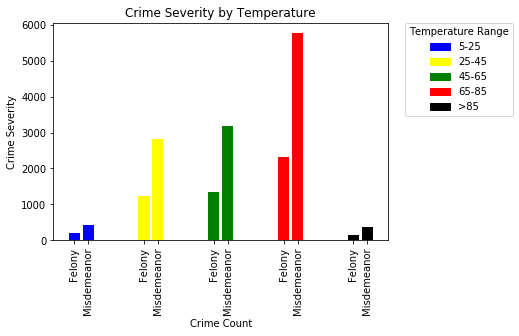

In [3]:
#Temperature group, crime severity bar chart
stevie_plot_df = crime_df[['Offenses Severity', 'Temperature', 'Weather Condition']].copy()


bins = [5,25,45,65,85,1000]
bin_names = ['5-25','25-45','45-65','65-85','>85']

stevie_plot_df['Temperature Group'] = pd.cut(stevie_plot_df["Temperature"],
                                             bins,
                                             labels=bin_names)

stevie_gp1 = stevie_plot_df.groupby(['Temperature Group','Offenses Severity'])
stevie_1_df = stevie_gp1.count()


x_pos = []
for x in range(len(bins) - 1):
    x_pos.append(x*5)
    x_pos.append(x*5+1)
    
    
tick_labels = ['Felony', "Misdemeanor"]
tick_labels = tick_labels *5 
tick_locations = [x for x in x_pos]

color = ['blue', 'yellow', 'green', 'red' , 'black']
colors = []
for x in color:
    colors.append(x)
    colors.append(x)
    

plt.bar(x_pos,
        stevie_1_df['Temperature'],
        color = colors
       )

plt.xticks(tick_locations,
           tick_labels,
           rotation = 'vertical'
          )

plt.title('Crime Severity by Temperature')

plt.xlabel('Crime Count')
plt.ylabel('Crime Severity')

patches = []
for x, y in zip(color, bin_names):
    patches.append(mpatches.Patch(color= x, label= y))
    
plt.legend(title = 'Temperature Range',
           handles=patches,
           bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.)

plt.show

### Luiz Peter

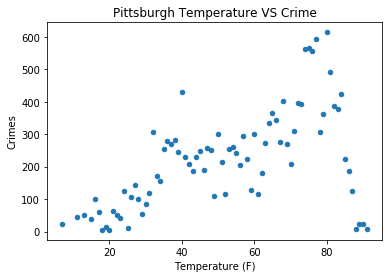

In [4]:
crime_df["Rounded Temp"]=round(crime_df["Temperature"])
temp_group = crime_df.groupby('Rounded Temp').count()["Age"].reset_index().rename(columns={"Age":"Crimes",
                                                                                               "Rounded Temp":"Temperature (F)"})
temp_group.plot(kind="scatter",x= "Temperature (F)" , y= "Crimes", title= "Pittsburgh Temperature VS Crime")
plt.savefig('temperature_crime.png')

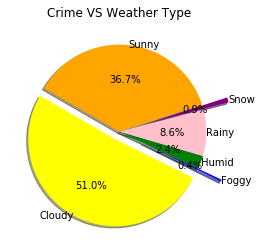

In [5]:
#Breaking down 15 categories into 6 total for plotting Crime VS 
crime_df["Weather Type"]=crime_df["Weather Condition"].replace({"Mostly Cloudy":"Cloudy","Overcast":"Cloudy","Partly Cloudy":"Cloudy",
                                           "Light Rain":"Rainy","Drizzle":"Rainy","Rain":"Rainy","Clear":"Sunny",
                                           "Light Snow":"Snow","Flurries":"Snow","Humid and Mostly Cloudy":"Humid",
                                            "Humid and Overcast":"Humid","Humid and Partly Cloudy":"Humid"})

temp_type = crime_df.groupby('Weather Type').count()["Age"].reset_index().rename(columns={"Age":"Crimes"})


# Weather Condition VS Percent of Crime: 
 
labels = []
for x in temp_type['Weather Type']:
    labels.append(x)

crimes = []
for x in temp_type['Crimes']:
    crimes.append(x)
    
colors = ["yellow" ,"blue" ,"green", "pink", "purple", "orange"]

explode = [.1,.3,0,0,.3,0]
     
plt.pie(crimes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, 
        pctdistance=.6, labeldistance=1, startangle=150)
plt.title("Crime VS Weather Type")

plt.savefig("wtype_crime.jpg")

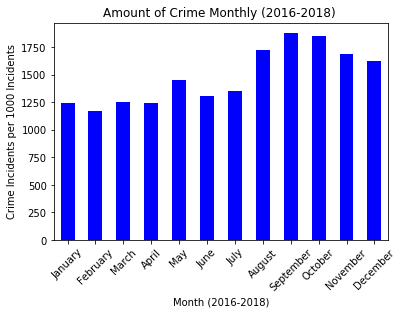

In [6]:
#PETER # Crime Frequency vs Time of Year (seasonality)
# Group data by each month
month_group = crime_df.groupby('Arrest Month')
# Find total amount of crime incidents in each month
monthly_crime = month_group['Arrest Date'].count()
# Organize Months to appear in correct yearly order
organized_monthly_crime = monthly_crime.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


# Graph data & edit chart
organized_monthly_crime_chart = organized_monthly_crime.plot(kind="bar", title="Amount of Crime Monthly (2016-2018) ", 
                                        rot='45', color='blue')
organized_monthly_crime_chart.set_xlabel("Month (2016-2018)")
organized_monthly_crime_chart.set_ylabel("Crime Incidents per 1000 Incidents")
# Show graph
plt.show()

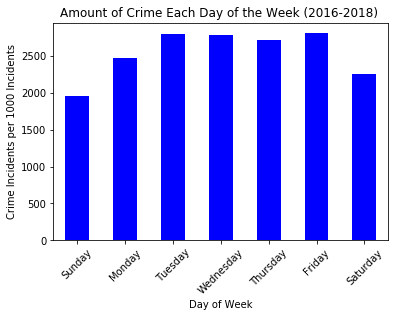

In [7]:
# Group data by each month
day_group = crime_df.groupby('Arrest Day of Week')
# Find total amount of crime incidents in each month
daily_crime = day_group['Arrest Date'].count()
# Organize Days of Week to be in correct order
organized_daily_crime = daily_crime.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                                 'Thursday', 'Friday', 'Saturday'])


# Graph data & edit chart
organized_daily_crime_chart = organized_daily_crime.plot(kind="bar", title="Amount of Crime Each Day of the Week (2016-2018) ", 
                                        rot='45', color='blue')
organized_daily_crime_chart.set_xlabel("Day of Week")
organized_daily_crime_chart.set_ylabel("Crime Incidents per 1000 Incidents")
# Show graph
plt.show()

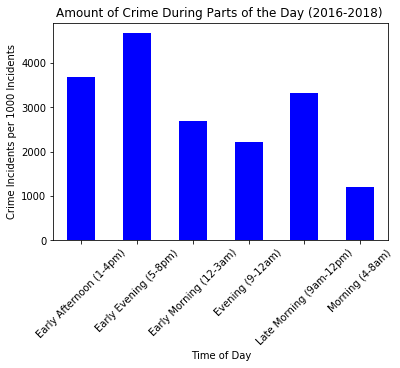

In [8]:
#PETER # Crime Frequency vs Time of Day 

# Group data by each month
day_time_group = crime_df.groupby('Arrest Time of Day')
# Find total amount of crime incidents in each month
day_time_crime = day_time_group['Arrest Date'].count()

# Graph data & edit chart
day_time_crime_chart = day_time_crime.plot(kind="bar", title="Amount of Crime During Parts of the Day (2016-2018) ", 
                                        rot='45', color='blue')
day_time_crime_chart.set_xlabel("Time of Day")
day_time_crime_chart.set_ylabel("Crime Incidents per 1000 Incidents")
# Show graph
plt.show()



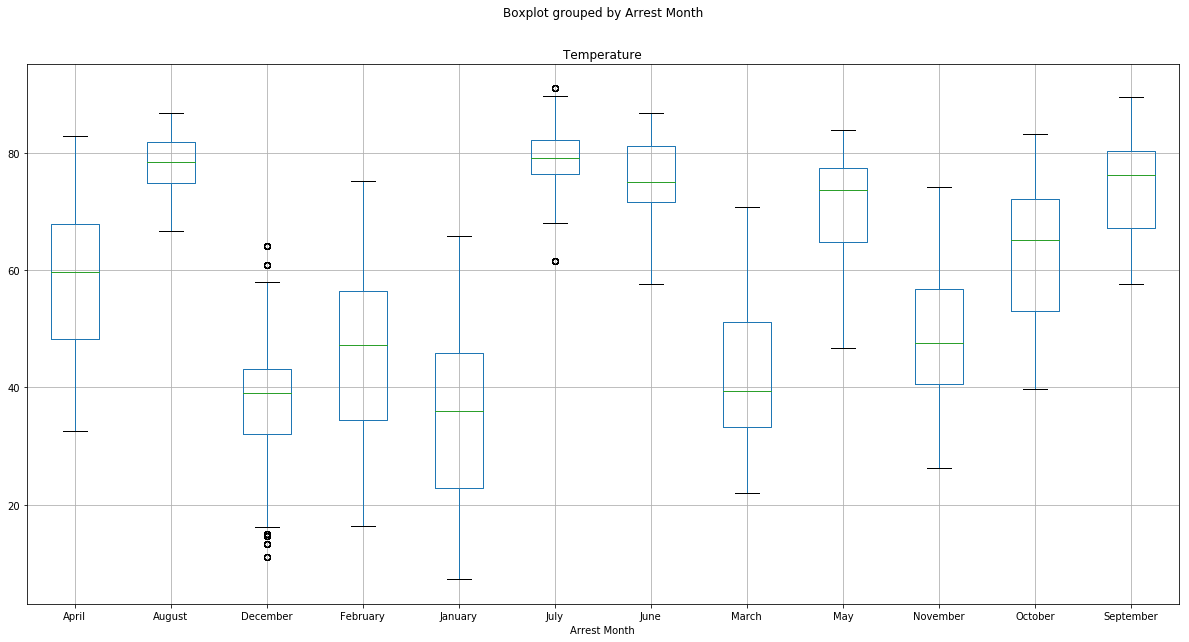

In [9]:
crime_df.boxplot("Temperature", by="Arrest Month", figsize=(20, 10))

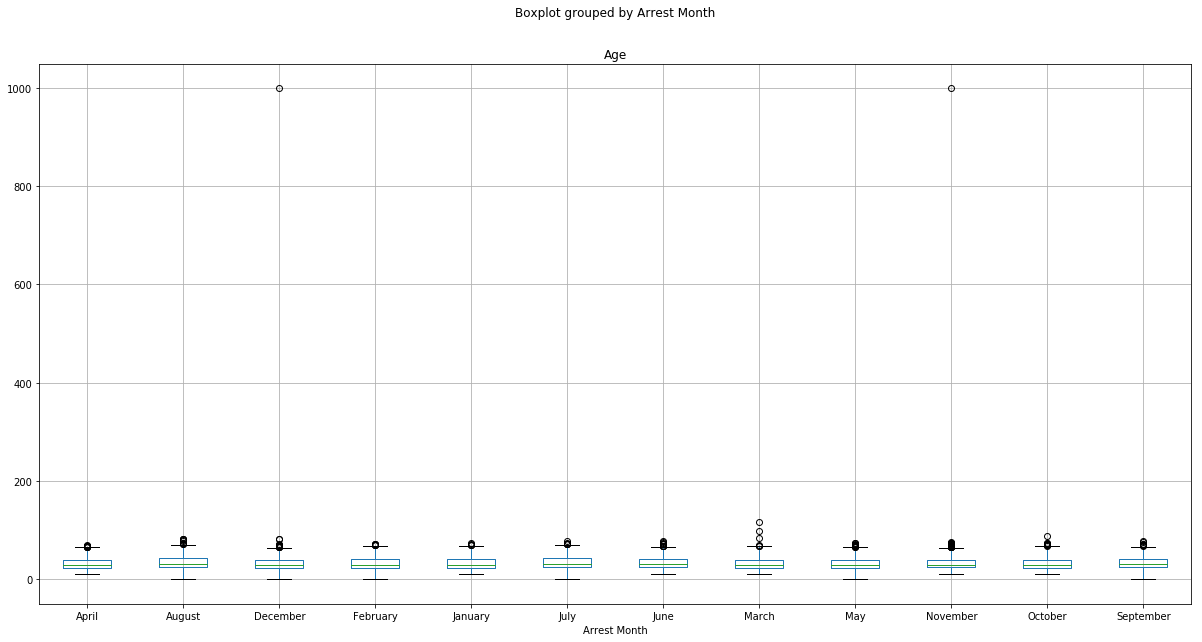

In [10]:
crime_df.boxplot("Age", by="Arrest Month", figsize=(20, 10))

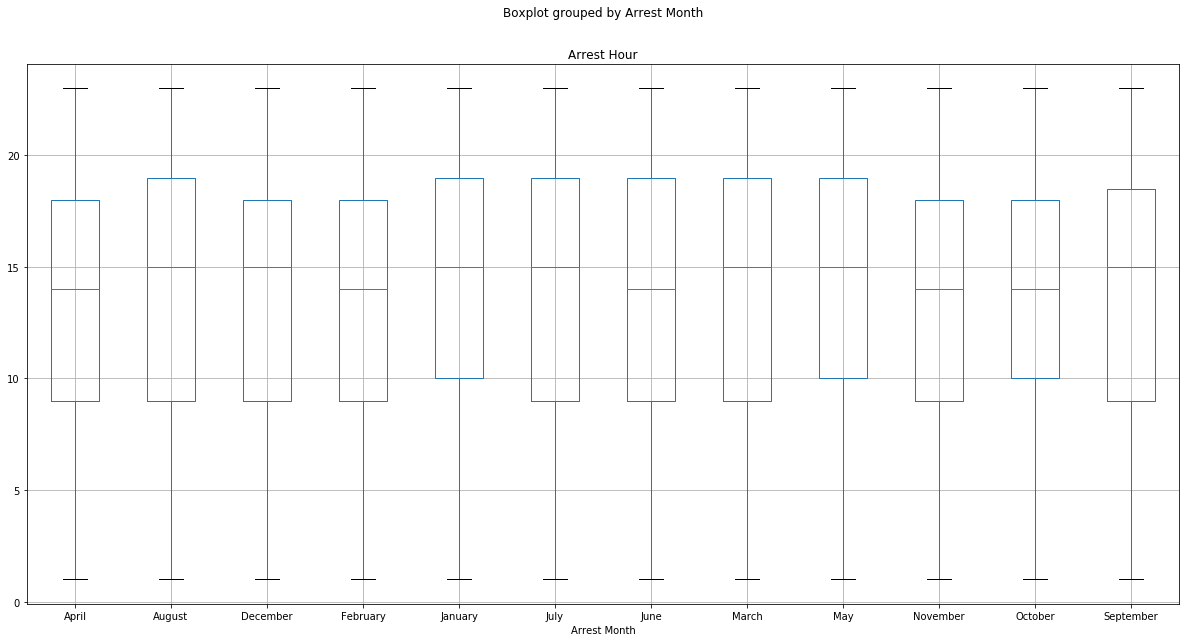

In [11]:
crime_df.boxplot("Arrest Hour", by="Arrest Month", figsize=(20, 10))

### Ema

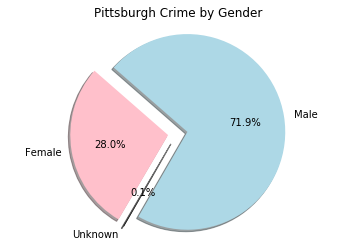

In [12]:
gender_count = crime_df["Gender"].value_counts()
total_gender_count = crime_df["Gender"].count()
gender_percentage = (gender_count/total_gender_count) *100

Gender = ["Male", "Female", "Unknown"]
Percent = [gender_percentage]
colors = ["LightBlue", "Pink", "Black"]
explode = (0.1, 0.1, 0.1)


plt.pie(gender_percentage, explode=explode, labels=Gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime by Gender")

plt.show()

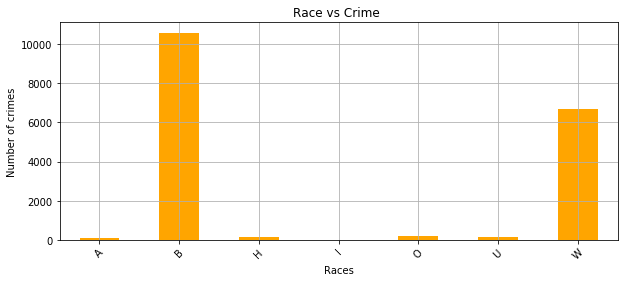

In [13]:
race_group = crime_df.groupby("Race")

race_type_crime = race_group["Offenses Severity"].count()

race_plot = race_type_crime.plot(kind="bar",
                                 title="Race vs Crime ",
                                 rot='45', color='orange',
                                 figsize=(10,4),grid=True)

# race_type_crime.plot.set_xlabel("Races")

# race_type_crime.plot.set_ylabel("Number of crimes")
race_plot.set_xlabel("Races")

race_plot.set_ylabel("Number of crimes")


plt.show()

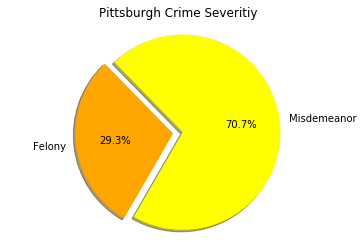

In [14]:
crime_type_count = crime_df["Offenses Severity"].value_counts()
total_crime_count = crime_df["Offenses Severity"].count()
crime_percentage = (crime_type_count/total_crime_count) *100

Offenses = ["Misdemeanor", "Felony"]
Percent = [crime_percentage]
colors = ["Yellow", "Orange"]
explode = (0.1,0)


plt.pie(crime_percentage, explode=explode, labels=Offenses, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime Severitiy")

plt.show()

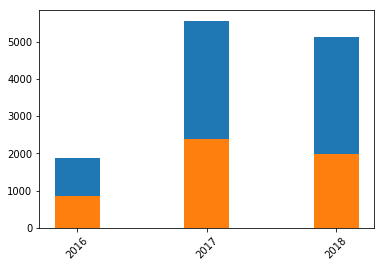

In [15]:
crime_df1 = crime_df.loc[:,["Offenses Severity", "Arrest Year", "Arrest Month"]]

df2=crime_df1.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)

order_list = ["January", "February", "March", "April", 
              "May", "June", "July", "August", "September", 
              "October", "November", "December"] 

df2 = crime_df.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)
df2 = df2[order_list]


df3 = crime_df.groupby(['Offenses Severity', 'Arrest Year'])['Offenses Severity'].count().unstack('Arrest Year').fillna(0)

felonies = df3[:1].values[0]

misdemeanor = df3[1:2].values[0]

number_of_x = np.arange(3)
p2 = plt.bar(number_of_x, misdemeanor, .35)
p1 = plt.bar(number_of_x, felonies, .35)

year_plot = plt.xticks(number_of_x, df3.columns, rotation=45)



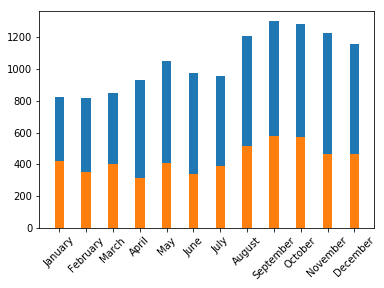

In [16]:
felonies = df2[:1].values[0]

misdemeanor = df2[1:2].values[0]



number_of_x = np.arange(12)
p2 = plt.bar(number_of_x, misdemeanor, .35)
p1 = plt.bar(number_of_x, felonies, .35)

month_plot = plt.xticks(number_of_x, df2.columns, rotation=45)